# Final Project of Capstone Project

## Project Name: Recommending the best location for opening new restaurants in Tokyo now

## Introduction/Business Problem section

### Introduction:
#### I would like to give an recommendations for who want to open new restaurant in Tokyo.
#### Targeted cities are Shinjulu city, Shibuya city, Chiyoda city and Minato city.
#### Those cities are the biggest and busiest in Japan.
#### For most of who do not know what are the cities, Shinjuku city is a typical city for office workers  and there are so many companies, Shibuya is a young and energetic city and there are tech and 
#### venture companies, Chiyoda city is a traditional city and most of bureaucrats and politicians work there and Minato city is an entertaining city and great places for young people. 
#### For this project, I will consider about this situation which was happened by Covid19.
#### As I know many of restaurant owners quit from their bussiness or hesitate to open new restaurants in this situation.
#### I consider about that and would like to give real recommendations.
#### *Introduction: Today restaurant owners are required to consider about viral infectious disease for running business.*
### Business Problem:
#### Business problem is how I can recommend to open new restaurant in this situation which people prefer to take meals to go than eating at restaurant.
#### Therefore on the premise that restaurants should provide service of take out.
#### However, even if we take meals to go, still we want to eat them in  somewhere has huge space such as parks.
#### I am going to think about this new factors for running restaurants by using  foursquare data.
#### First, I would like to compare which cities will be the best and in the end if it is possible, I want to give an recommendation of almost exactly where they should open by geographical and statistical data.
#### *Business Problem: Restaurant owners need to provide service of take out today and should consider the location which customer can have meals in not crowded place easily.*

## Data section

### Data:
#### As I mentioned in Introduction/Business Problem section, resaurants are required to provide service of take out in this siutation.
#### If I think it simply they should open restaurants in where close to parks. 
#### Therefore first, I will use foursquare for finding numbers of parks of Shinjulu city, Shibuya city, Chiyoda city and Minato city.
#### Also I need to find out how many restaurants in each city.
#### If there are too many restaurants already, I should not recommend because those existed reaurants more likely have already provide service of take out.
#### I am going to obtain data about parks and restaurants from mainly foursquare unless I need additional information.
#### After collecting data, I would try to use methods that I learned in this course and find out more about this project.
#### *Data: For finding the best location, data which is about parks and restaurants is going to be obtained from foursquare.*

## Methodology section 

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
#pip install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
!pip install folium
#pip install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

     |████████████████████████████████| 102kB 8.8MB/s ta 0:00:011
Folium installed
Libraries imported.


In [2]:
CLIENT_ID = '2IHCKLRVZN1AD5M5EVAMAZGMO3BEESCLEBXZLLYTR2KRZE23' # your Foursquare ID
CLIENT_SECRET = '5N3MUFHBC43HEJ0KAA0REIK3SMLLW5CMC2DLP02O1515ICST' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2IHCKLRVZN1AD5M5EVAMAZGMO3BEESCLEBXZLLYTR2KRZE23
CLIENT_SECRET:5N3MUFHBC43HEJ0KAA0REIK3SMLLW5CMC2DLP02O1515ICST


In [3]:
#Adress of Shinjuku city in Japan
address_Shinjuku = 'Shinjuku, JP'

geolocator = Nominatim(user_agent="foursquare_agent")
location_Shinjuku = geolocator.geocode(address_Shinjuku)
latitude_Shinjuku = location_Shinjuku.latitude
longitude_Shinjuku = location_Shinjuku.longitude
print(latitude_Shinjuku, longitude_Shinjuku)

35.6937632 139.7036319


In [4]:
#Adress of Shibuya city in Japan
address_Shibuya = 'Shibuya, JP'

location_Shibuya = geolocator.geocode(address_Shibuya)
latitude_Shibuya = location_Shinjuku.latitude
longitude_Shibuya = location_Shibuya.longitude
print(latitude_Shibuya, longitude_Shibuya)

35.6937632 139.6987107


In [5]:
#Adress of Chiyoda city in Japan
address_Chiyoda = 'Chiyoda, JP'

location_Chiyoda = geolocator.geocode(address_Chiyoda)
latitude_Chiyoda = location_Chiyoda.latitude
longitude_Chiyoda = location_Chiyoda.longitude
print(latitude_Chiyoda, longitude_Chiyoda)

35.6938097 139.7532163


In [6]:
#Adress of Minato city in Japan
address_Minato = 'Minato, JP'

location_Minato = geolocator.geocode(address_Minato)
latitude_Minato = location_Minato.latitude
longitude_Minato = location_Minato.longitude
print(latitude_Minato, longitude_Minato)

35.6432274 139.7400553


In [7]:
#公園 = park. For some reason, if I put park English,that included some weird places too.
search_query = '公園'
radius = 500
print(search_query + ' .... OK!')

公園 .... OK!


In [8]:
url_Shinjuku_park = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Shinjuku, longitude_Shinjuku, VERSION, search_query, radius, LIMIT)
url_Shinjuku_park

'https://api.foursquare.com/v2/venues/search?client_id=2IHCKLRVZN1AD5M5EVAMAZGMO3BEESCLEBXZLLYTR2KRZE23&client_secret=5N3MUFHBC43HEJ0KAA0REIK3SMLLW5CMC2DLP02O1515ICST&ll=35.6937632,139.7036319&v=20180604&query=公園&radius=500&limit=30'

In [9]:
results_Shinjuku_park = requests.get(url_Shinjuku_park).json()
results_Shinjuku_park

{'meta': {'code': 200, 'requestId': '5ed24ecc83525f001b804eb1'},
 'response': {'venues': [{'id': '4bcc021a937ca593e685aa92',
    'name': '新宿遊歩道公園 四季の路',
    'location': {'address': '歌舞伎町1-1',
     'lat': 35.694562,
     'lng': 139.704569,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.694562,
       'lng': 139.704569}],
     'distance': 122,
     'postalCode': '160-0021',
     'cc': 'JP',
     'city': '新宿区',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['歌舞伎町1-1', '新宿区, 東京都', '160-0021', '日本']},
    'categories': [{'id': '4bf58dd8d48988d1f9931735',
      'name': 'Road',
      'pluralName': 'Roads',
      'shortName': 'Road',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/highway_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1590841116',
    'hasPerk': False},
   {'id': '4b5fbf2df964a52019cb29e3',
    'name': 'Kashiwagi Park (柏木公園)',
    'location': {'address': '西新宿7-14',
     'lat': 35.694847267

In [10]:
items_Shinjuku_park = results_Shinjuku_park['response']['venues']
items_Shinjuku_park

[{'id': '4bcc021a937ca593e685aa92',
  'name': '新宿遊歩道公園 四季の路',
  'location': {'address': '歌舞伎町1-1',
   'lat': 35.694562,
   'lng': 139.704569,
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.694562,
     'lng': 139.704569}],
   'distance': 122,
   'postalCode': '160-0021',
   'cc': 'JP',
   'city': '新宿区',
   'state': '東京都',
   'country': '日本',
   'formattedAddress': ['歌舞伎町1-1', '新宿区, 東京都', '160-0021', '日本']},
  'categories': [{'id': '4bf58dd8d48988d1f9931735',
    'name': 'Road',
    'pluralName': 'Roads',
    'shortName': 'Road',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/highway_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1590841116',
  'hasPerk': False},
 {'id': '4b5fbf2df964a52019cb29e3',
  'name': 'Kashiwagi Park (柏木公園)',
  'location': {'address': '西新宿7-14',
   'lat': 35.69484726738949,
   'lng': 139.69755639970532,
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.69484726738949,
     'lng': 139.69755639970532}]

In [11]:
#From here 1 = Shinjuku data
dataframe1_park = json_normalize(items_Shinjuku_park) # flatten JSON

# filter columns
#filtered_columns_park = ['name', 'categories','id', 'location.formattedAddress','location.lat','location.lng']
filtered_columns_park = ['name', 'categories','id','location.lat','location.lng']
dataframe1_filtered_park = dataframe1_park.loc[:, filtered_columns_park]

# clean columns
dataframe1_filtered_park.columns = [col.split('.')[-1] for col in dataframe1_filtered_park.columns]

#dataframe
dataframe1_filtered_park

,name,categories,id,lat,lng
0,新宿遊歩道公園 四季の路,"[{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...",4bcc021a937ca593e685aa92,35.694562,139.704569
1,Kashiwagi Park (柏木公園),"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4b5fbf2df964a52019cb29e3,35.694847,139.697556
2,公益財団法人 東京都公園協会,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",504457a2e4b037986897f270,35.696246,139.701062
3,歌舞伎町公園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",532e9e27498ee94a23dfc6f3,35.694381,139.702346
4,新宿遊歩道公園 公衆トイレ,"[{'id': '5744ccdfe4b0c0459246b4c4', 'name': 'P...",59e87f1a6eda025b69af0cf9,35.693918,139.704307
5,Okubo Park (大久保公園),"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4c36f1ed93db0f471be01e92,35.697397,139.701264
6,東大久保公園,"[{'id': '4bf58dd8d48988d1e7941735', 'name': 'P...",4ed71e362c5b95fea16e59f7,35.694859,139.709118
7,大久保公園 喫煙所,"[{'id': '56aa371be4b08b9a8d57356a', 'name': 'O...",59f67e353b83077c09425620,35.697089,139.701684
8,Kabukicho Intersection (歌舞伎町交差点),"[{'id': '52f2ab2ebcbc57f1066b8b4c', 'name': 'I...",4db83d02cda105154123c4c4,35.693529,139.701265
9,アイン薬局 大久保店,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",56480e07498ee13b454ceeaa,35.697252,139.701859


In [12]:
# I found there are toilet, smoking place and drug store  are included in this data so I will exculude them.
# I guess maynbe those are put "Park" elements coincidentally. 
dataframe1_filtered_park_clean = dataframe1_filtered_park
dataframe1_filtered_park_clean.drop(index=[5,7, 9], inplace = True)
dataframe1_filtered_park_clean

,name,categories,id,lat,lng
0,新宿遊歩道公園 四季の路,"[{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...",4bcc021a937ca593e685aa92,35.694562,139.704569
1,Kashiwagi Park (柏木公園),"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4b5fbf2df964a52019cb29e3,35.694847,139.697556
2,公益財団法人 東京都公園協会,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",504457a2e4b037986897f270,35.696246,139.701062
3,歌舞伎町公園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",532e9e27498ee94a23dfc6f3,35.694381,139.702346
4,新宿遊歩道公園 公衆トイレ,"[{'id': '5744ccdfe4b0c0459246b4c4', 'name': 'P...",59e87f1a6eda025b69af0cf9,35.693918,139.704307
6,東大久保公園,"[{'id': '4bf58dd8d48988d1e7941735', 'name': 'P...",4ed71e362c5b95fea16e59f7,35.694859,139.709118
8,Kabukicho Intersection (歌舞伎町交差点),"[{'id': '52f2ab2ebcbc57f1066b8b4c', 'name': 'I...",4db83d02cda105154123c4c4,35.693529,139.701265


In [13]:
dataframe1_filtered_park_clean = dataframe1_filtered_park_clean.reset_index(drop=True)
dataframe1_filtered_park_clean

,name,categories,id,lat,lng
0,新宿遊歩道公園 四季の路,"[{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...",4bcc021a937ca593e685aa92,35.694562,139.704569
1,Kashiwagi Park (柏木公園),"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4b5fbf2df964a52019cb29e3,35.694847,139.697556
2,公益財団法人 東京都公園協会,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",504457a2e4b037986897f270,35.696246,139.701062
3,歌舞伎町公園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",532e9e27498ee94a23dfc6f3,35.694381,139.702346
4,新宿遊歩道公園 公衆トイレ,"[{'id': '5744ccdfe4b0c0459246b4c4', 'name': 'P...",59e87f1a6eda025b69af0cf9,35.693918,139.704307
5,東大久保公園,"[{'id': '4bf58dd8d48988d1e7941735', 'name': 'P...",4ed71e362c5b95fea16e59f7,35.694859,139.709118
6,Kabukicho Intersection (歌舞伎町交差点),"[{'id': '52f2ab2ebcbc57f1066b8b4c', 'name': 'I...",4db83d02cda105154123c4c4,35.693529,139.701265


### I found out there are total 7 parks in Shinjuku.
### Data is dataframe1_filtered_park_clean

### Next is Shibuya

In [14]:
url_Shibuya_park = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Shibuya, longitude_Shibuya, VERSION, search_query, radius, LIMIT)
url_Shibuya_park

'https://api.foursquare.com/v2/venues/search?client_id=2IHCKLRVZN1AD5M5EVAMAZGMO3BEESCLEBXZLLYTR2KRZE23&client_secret=5N3MUFHBC43HEJ0KAA0REIK3SMLLW5CMC2DLP02O1515ICST&ll=35.6937632,139.6987107&v=20180604&query=公園&radius=500&limit=30'

In [15]:
results_Shibuya_park = requests.get(url_Shibuya_park).json()
results_Shibuya_park

{'meta': {'code': 200, 'requestId': '5ed24d62bae9a2001b5690ee'},
 'response': {'venues': [{'id': '4b5fbf2df964a52019cb29e3',
    'name': 'Kashiwagi Park (柏木公園)',
    'location': {'address': '西新宿7-14',
     'lat': 35.69484726738949,
     'lng': 139.69755639970532,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.69484726738949,
       'lng': 139.69755639970532}],
     'distance': 159,
     'postalCode': '160-0023',
     'cc': 'JP',
     'city': '東京',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['西新宿7-14', '新宿区, 東京都', '160-0023', '日本']},
    'categories': [{'id': '4bf58dd8d48988d163941735',
      'name': 'Park',
      'pluralName': 'Parks',
      'shortName': 'Park',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1590841117',
    'hasPerk': False},
   {'id': '4bcc021a937ca593e685aa92',
    'name': '新宿遊歩道公園 四季の路',
    'location': {'address':

In [16]:
items_Shibuya_park = results_Shibuya_park['response']['venues']
items_Shibuya_park

[{'id': '4b5fbf2df964a52019cb29e3',
  'name': 'Kashiwagi Park (柏木公園)',
  'location': {'address': '西新宿7-14',
   'lat': 35.69484726738949,
   'lng': 139.69755639970532,
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.69484726738949,
     'lng': 139.69755639970532}],
   'distance': 159,
   'postalCode': '160-0023',
   'cc': 'JP',
   'city': '東京',
   'state': '東京都',
   'country': '日本',
   'formattedAddress': ['西新宿7-14', '新宿区, 東京都', '160-0023', '日本']},
  'categories': [{'id': '4bf58dd8d48988d163941735',
    'name': 'Park',
    'pluralName': 'Parks',
    'shortName': 'Park',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1590841117',
  'hasPerk': False},
 {'id': '4bcc021a937ca593e685aa92',
  'name': '新宿遊歩道公園 四季の路',
  'location': {'address': '歌舞伎町1-1',
   'lat': 35.694562,
   'lng': 139.704569,
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.694562,
     'lng': 139.7045

In [17]:
#From here 2 = Shibuya data
dataframe2 = json_normalize(items_Shibuya_park) # flatten JSON

# filter columns
filtered_columns_park = ['name', 'categories','id','location.lat','location.lng']
dataframe2_filtered_park = dataframe2.loc[:, filtered_columns_park]

# clean columns
dataframe2_filtered_park.columns = [col.split('.')[-1] for col in dataframe2_filtered_park.columns]

#dataframe2
dataframe2_filtered_park

,name,categories,id,lat,lng
0,Kashiwagi Park (柏木公園),"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4b5fbf2df964a52019cb29e3,35.694847,139.697556
1,新宿遊歩道公園 四季の路,"[{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...",4bcc021a937ca593e685aa92,35.694562,139.704569
2,公益財団法人 東京都公園協会,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",504457a2e4b037986897f270,35.696246,139.701062
3,Okubo Park (大久保公園),"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4c36f1ed93db0f471be01e92,35.697397,139.701264
4,歌舞伎町公園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",532e9e27498ee94a23dfc6f3,35.694381,139.702346
5,Little Park Bridge (公園小橋),"[{'id': '4bf58dd8d48988d1df941735', 'name': 'B...",4c0addb2ffb8c9b63e626c61,35.691905,139.693951
6,大久保公園 喫煙所,"[{'id': '56aa371be4b08b9a8d57356a', 'name': 'O...",59f67e353b83077c09425620,35.697089,139.701684
7,新宿遊歩道公園 公衆トイレ,"[{'id': '5744ccdfe4b0c0459246b4c4', 'name': 'P...",59e87f1a6eda025b69af0cf9,35.693918,139.704307
8,野方第一公園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",502ee77de4b047ef9a394038,35.692125,139.694241
9,Kabukicho Intersection (歌舞伎町交差点),"[{'id': '52f2ab2ebcbc57f1066b8b4c', 'name': 'I...",4db83d02cda105154123c4c4,35.693529,139.701265


In [19]:
# I found there are smoking place, toilet, drug store and convinience store are included in this data so I will exculude them.
# I guess maynbe those are put "Park" elements coincidentally.
dataframe2_filtered_park_clean = dataframe2_filtered_park
dataframe2_filtered_park_clean.drop(index=[5,8, 10, 11],inplace = True)
print(dataframe2_filtered_park_clean)


                               name  \
0             Kashiwagi Park (柏木公園)   
1                      新宿遊歩道公園 四季の路   
2                    公益財団法人 東京都公園協会   
3                Okubo Park (大久保公園)   
4                            歌舞伎町公園   
6                         大久保公園 喫煙所   
7                     新宿遊歩道公園 公衆トイレ   
9  Kabukicho Intersection (歌舞伎町交差点)   

                                          categories  \
0  [{'id': '4bf58dd8d48988d163941735', 'name': 'P...   
1  [{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...   
2  [{'id': '4bf58dd8d48988d124941735', 'name': 'O...   
3  [{'id': '4bf58dd8d48988d163941735', 'name': 'P...   
4  [{'id': '4bf58dd8d48988d163941735', 'name': 'P...   
6  [{'id': '56aa371be4b08b9a8d57356a', 'name': 'O...   
7  [{'id': '5744ccdfe4b0c0459246b4c4', 'name': 'P...   
9  [{'id': '52f2ab2ebcbc57f1066b8b4c', 'name': 'I...   

                         id        lat         lng  
0  4b5fbf2df964a52019cb29e3  35.694847  139.697556  
1  4bcc021a937ca593e685aa92  35.69456

In [20]:
dataframe2_filtered_park_clean = dataframe2_filtered_park_clean.reset_index(drop=True)
dataframe2_filtered_park_clean

,name,categories,id,lat,lng
0,Kashiwagi Park (柏木公園),"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4b5fbf2df964a52019cb29e3,35.694847,139.697556
1,新宿遊歩道公園 四季の路,"[{'id': '4bf58dd8d48988d1f9931735', 'name': 'R...",4bcc021a937ca593e685aa92,35.694562,139.704569
2,公益財団法人 東京都公園協会,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",504457a2e4b037986897f270,35.696246,139.701062
3,Okubo Park (大久保公園),"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4c36f1ed93db0f471be01e92,35.697397,139.701264
4,歌舞伎町公園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",532e9e27498ee94a23dfc6f3,35.694381,139.702346
5,大久保公園 喫煙所,"[{'id': '56aa371be4b08b9a8d57356a', 'name': 'O...",59f67e353b83077c09425620,35.697089,139.701684
6,新宿遊歩道公園 公衆トイレ,"[{'id': '5744ccdfe4b0c0459246b4c4', 'name': 'P...",59e87f1a6eda025b69af0cf9,35.693918,139.704307
7,Kabukicho Intersection (歌舞伎町交差点),"[{'id': '52f2ab2ebcbc57f1066b8b4c', 'name': 'I...",4db83d02cda105154123c4c4,35.693529,139.701265


### Shibuya has 8 parks.
### Data is dataframe2_filtered_park_clean
### Next is Chiyoda.

In [21]:
url_Chiyoda_park = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Chiyoda, longitude_Chiyoda, VERSION, search_query, radius, LIMIT)
url_Chiyoda_park

'https://api.foursquare.com/v2/venues/search?client_id=2IHCKLRVZN1AD5M5EVAMAZGMO3BEESCLEBXZLLYTR2KRZE23&client_secret=5N3MUFHBC43HEJ0KAA0REIK3SMLLW5CMC2DLP02O1515ICST&ll=35.6938097,139.7532163&v=20180604&query=公園&radius=500&limit=30'

In [22]:
results_Chiyoda_park = requests.get(url_Chiyoda_park).json()
results_Chiyoda_park

{'meta': {'code': 200, 'requestId': '5ed24de898205d001b833bd2'},
 'response': {'venues': [{'id': '4b6c1461f964a520c2222ce3',
    'name': '神保町愛全公園',
    'location': {'address': '神田神保町2-20-3',
     'lat': 35.69697872624495,
     'lng': 139.75629301770923,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.69697872624495,
       'lng': 139.75629301770923}],
     'distance': 449,
     'postalCode': '101-0051',
     'cc': 'JP',
     'city': '東京',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['神田神保町2-20-3', '千代田区, 東京都', '101-0051', '日本']},
    'categories': [{'id': '4bf58dd8d48988d163941735',
      'name': 'Park',
      'pluralName': 'Parks',
      'shortName': 'Park',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1590841156',
    'hasPerk': False},
   {'id': '4c1c8b8c63750f472bc0b667',
    'name': 'Nishi-Kanda Park (西神田公園)',
    'location': {'ad

In [23]:
items_Chiyoda_park = results_Chiyoda_park['response']['venues']
items_Chiyoda_park

[{'id': '4b6c1461f964a520c2222ce3',
  'name': '神保町愛全公園',
  'location': {'address': '神田神保町2-20-3',
   'lat': 35.69697872624495,
   'lng': 139.75629301770923,
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.69697872624495,
     'lng': 139.75629301770923}],
   'distance': 449,
   'postalCode': '101-0051',
   'cc': 'JP',
   'city': '東京',
   'state': '東京都',
   'country': '日本',
   'formattedAddress': ['神田神保町2-20-3', '千代田区, 東京都', '101-0051', '日本']},
  'categories': [{'id': '4bf58dd8d48988d163941735',
    'name': 'Park',
    'pluralName': 'Parks',
    'shortName': 'Park',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1590841156',
  'hasPerk': False},
 {'id': '4c1c8b8c63750f472bc0b667',
  'name': 'Nishi-Kanda Park (西神田公園)',
  'location': {'address': '西神田2-3-11',
   'lat': 35.69851948749026,
   'lng': 139.75472237219697,
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.698

In [24]:
#From here 3 = Chiyoda data
dataframe3 = json_normalize(items_Chiyoda_park) # flatten JSON

# filter columns
filtered_columns_park = ['name', 'categories','id','location.lat','location.lng']
dataframe3_filtered_park = dataframe3.loc[:, filtered_columns_park]

# clean columns
dataframe3_filtered_park.columns = [col.split('.')[-1] for col in dataframe3_filtered_park.columns]

#dataframe3
dataframe3_filtered_park

,name,categories,id,lat,lng
0,神保町愛全公園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4b6c1461f964a520c2222ce3,35.696979,139.756293
1,Nishi-Kanda Park (西神田公園),"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4c1c8b8c63750f472bc0b667,35.698519,139.754722
2,A2-03.Nishikanda Park(West side) - Tokyo Chiyo...,"[{'id': '4e4c9077bd41f78e849722f9', 'name': 'B...",5636eee7498eaf29d53306f0,35.698277,139.754840
3,九段坂公園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",51a98ec1498ec63158095450,35.694738,139.748725
4,Tayasu-mon Gate Intersection (田安門交差点),"[{'id': '52f2ab2ebcbc57f1066b8b4c', 'name': 'I...",4d64ee49072a6ea89c2ff74d,35.694969,139.748672
5,堀留南児童遊園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4de4af6cc65b7a3e214f18b2,35.697918,139.752113
6,俎橋児童遊園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4e1400a86284431b53535c3b,35.695833,139.752495


### So Chiyoda is 7 parks and there are no any places other than parks.
### Data is dataframe3_filtered_park
### Next is Minato.

In [25]:
url_Minato_park = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Minato, longitude_Minato, VERSION, search_query, radius, LIMIT)
url_Minato_park

'https://api.foursquare.com/v2/venues/search?client_id=2IHCKLRVZN1AD5M5EVAMAZGMO3BEESCLEBXZLLYTR2KRZE23&client_secret=5N3MUFHBC43HEJ0KAA0REIK3SMLLW5CMC2DLP02O1515ICST&ll=35.6432274,139.7400553&v=20180604&query=公園&radius=500&limit=30'

In [26]:
results_Minato_park = requests.get(url_Minato_park).json()
results_Minato_park

{'meta': {'code': 200, 'requestId': '5ed24cc002a172001bb926df'},
 'response': {'venues': [{'id': '4b56a3cef964a520611728e3',
    'name': 'Kamezuka Park (亀塚公園)',
    'location': {'address': '三田4-16-20',
     'lat': 35.643333781815215,
     'lng': 139.74052164682098,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.643333781815215,
       'lng': 139.74052164682098}],
     'distance': 43,
     'postalCode': '108-0073',
     'cc': 'JP',
     'city': '東京',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['三田4-16-20', '港区, 東京都', '108-0073', '日本']},
    'categories': [{'id': '4bf58dd8d48988d163941735',
      'name': 'Park',
      'pluralName': 'Parks',
      'shortName': 'Park',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1590841156',
    'hasPerk': False},
   {'id': '4de3637245dd180ae55cbda8',
    'name': '港区立高浜公園',
    'location': {'address': '

In [27]:
items_Minato_park = results_Minato_park['response']['venues']
items_Minato_park

[{'id': '4b56a3cef964a520611728e3',
  'name': 'Kamezuka Park (亀塚公園)',
  'location': {'address': '三田4-16-20',
   'lat': 35.643333781815215,
   'lng': 139.74052164682098,
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.643333781815215,
     'lng': 139.74052164682098}],
   'distance': 43,
   'postalCode': '108-0073',
   'cc': 'JP',
   'city': '東京',
   'state': '東京都',
   'country': '日本',
   'formattedAddress': ['三田4-16-20', '港区, 東京都', '108-0073', '日本']},
  'categories': [{'id': '4bf58dd8d48988d163941735',
    'name': 'Park',
    'pluralName': 'Parks',
    'shortName': 'Park',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1590841156',
  'hasPerk': False},
 {'id': '4de3637245dd180ae55cbda8',
  'name': '港区立高浜公園',
  'location': {'address': '芝浦4-3-30',
   'lat': 35.63810056832932,
   'lng': 139.74337874577267,
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.6381005683293

In [28]:
#From here 4 = Minato data
dataframe4 = json_normalize(items_Minato_park) # flatten JSON

# filter columns
filtered_columns_park = ['name', 'categories','id','location.lat','location.lng']
dataframe4_filtered_park = dataframe4.loc[:, filtered_columns_park]

# clean columns
dataframe4_filtered_park.columns = [col.split('.')[-1] for col in dataframe4_filtered_park.columns]

#dataframe4
dataframe4_filtered_park

,name,categories,id,lat,lng
0,Kamezuka Park (亀塚公園),"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4b56a3cef964a520611728e3,35.643334,139.740522
1,港区立高浜公園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4de3637245dd180ae55cbda8,35.638101,139.743379
2,三田台公園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4b5a5610f964a52030be28e3,35.642481,139.739210
3,三田台公園 ビオトープ,"[{'id': '52e81612bcbc57f1066b7a13', 'name': 'N...",5732ef89498e7f7dfe676cd9,35.642350,139.739750
4,港区立高松くすのき公園,"[{'id': '4bf58dd8d48988d163941735', 'name': 'P...",4d143bf11356a0939a73c782,35.643025,139.735990
5,大庭城址公園,[],4dbe5e19fa8cee72737dd5d3,35.643475,139.744786
6,車町児童遊園,"[{'id': '4bf58dd8d48988d1e7941735', 'name': 'P...",4c19ace5d4d9c9282b6cf129,35.637119,139.739737
7,白高児童遊園,"[{'id': '4bf58dd8d48988d1e7941735', 'name': 'P...",4c0982ccffb8c9b66c0f6a61,35.644718,139.734824


### So Minato is 8 parks and there are no any places other than parks.
### Data is dataframe4_filtered_park
### This is the last for parks.

### Shinjuku:7 parks, Shibuya:8 parks, Chiyoda:7 parks, Minato: 8 parks.
### So I found out in each areas, there are more like same numbers of parks.
### Next I will find out how many restaurants in each areas.

In [29]:
#restaurant = レストラン. If i searched in English. There were less restaurants than sarching in Japanese.
search_query_r = "レストラン"
radius = 500
print(search_query_r + ' .... OK!')

レストラン .... OK!


In [30]:
url_Shinjuku_r = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Shinjuku, longitude_Shinjuku, VERSION, search_query_r, radius, LIMIT)
url_Shinjuku_r

'https://api.foursquare.com/v2/venues/search?client_id=2IHCKLRVZN1AD5M5EVAMAZGMO3BEESCLEBXZLLYTR2KRZE23&client_secret=5N3MUFHBC43HEJ0KAA0REIK3SMLLW5CMC2DLP02O1515ICST&ll=35.6937632,139.7036319&v=20180604&query=レストラン&radius=500&limit=30'

In [31]:
results_Shinjuku_r = requests.get(url_Shinjuku_r).json()
results_Shinjuku_r

{'meta': {'code': 200, 'requestId': '5ed24d8abae9a2001b57012f'},
 'response': {'venues': [{'id': '5053222fe4b055f81ad14a41',
    'name': 'Robot Restaurant (ロボットレストラン)',
    'location': {'address': '歌舞伎町1-7-1',
     'crossStreet': '新宿ロボットビル B2F',
     'lat': 35.6943187,
     'lng': 139.7028432,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.6943187,
       'lng': 139.7028432}],
     'distance': 94,
     'postalCode': '160-0021',
     'cc': 'JP',
     'city': '東京',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['歌舞伎町1-7-1 (新宿ロボットビル B2F)',
      '新宿区, 東京都',
      '160-0021',
      '日本']},
    'categories': [{'id': '56aa371be4b08b9a8d573538',
      'name': 'Theme Restaurant',
      'pluralName': 'Theme Restaurants',
      'shortName': 'Theme Restaurant',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1590841157',
    'hasPerk': False},
   {'id': '4c

In [32]:
items_Shinjuku_r = results_Shinjuku_r['response']['venues']

In [33]:
#From here 1 = Shinjuku data
dataframe1_r = json_normalize(items_Shinjuku_r) # flatten JSON

# filter columns
#filtered_columns_park = ['name', 'categories','id', 'location.formattedAddress','location.lat','location.lng']
filtered_columns_r = ['name', 'categories','id','location.lat','location.lng']
dataframe1_filtered_r = dataframe1_r.loc[:, filtered_columns_r]

# clean columns
dataframe1_filtered_r.columns = [col.split('.')[-1] for col in dataframe1_filtered_r.columns]

#dataframe
dataframe1_filtered_r.head()

,name,categories,id,lat,lng
0,Robot Restaurant (ロボットレストラン),"[{'id': '56aa371be4b08b9a8d573538', 'name': 'T...",5053222fe4b055f81ad14a41,35.694319,139.702843
1,レストランはやしや,"[{'id': '55a59bace4b013909087cb36', 'name': 'Y...",4c7e2ce510916dcb636f2b96,35.693436,139.701892
2,Bakery Restaurant Saint Marc (ベーカリーレストラン サンマルク),"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",4d12cc1dffa1224b3a1a9cad,35.692443,139.698503
3,J'z (フレンチバル&レストラン ジェイズ),"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",50160a5ee4b0ad6ab3763d4b,35.693103,139.704352
4,タイレストラン ヤカ,"[{'id': '4bf58dd8d48988d149941735', 'name': 'T...",4dee19867d8bb2167432e890,35.694872,139.705330


In [119]:
#how many restraurants in Shinjuku?
print(len(dataframe1_filtered_r) )

30


### Shinjuku has 30 restaurants.
### Data is dataframe1_filtered_r
### Next is Shibuya

In [35]:
url_Shibuya_r = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Shibuya, longitude_Shibuya, VERSION, search_query_r, radius, LIMIT)
url_Shibuya_r

'https://api.foursquare.com/v2/venues/search?client_id=2IHCKLRVZN1AD5M5EVAMAZGMO3BEESCLEBXZLLYTR2KRZE23&client_secret=5N3MUFHBC43HEJ0KAA0REIK3SMLLW5CMC2DLP02O1515ICST&ll=35.6937632,139.6987107&v=20180604&query=レストラン&radius=500&limit=30'

In [36]:
results_Shibuya_r = requests.get(url_Shibuya_r).json()
results_Shibuya_r

{'meta': {'code': 200, 'requestId': '5ed24ecf69babe001b1cdd09'},
 'response': {'venues': [{'id': '4d12cc1dffa1224b3a1a9cad',
    'name': 'Bakery Restaurant Saint Marc (ベーカリーレストラン サンマルク)',
    'location': {'address': '西新宿1-5-1',
     'crossStreet': '新宿西口ハルク 8F',
     'lat': 35.692443,
     'lng': 139.698503,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.692443,
       'lng': 139.698503}],
     'distance': 148,
     'postalCode': '160-0023',
     'cc': 'JP',
     'city': '東京',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['西新宿1-5-1 (新宿西口ハルク 8F)',
      '新宿区, 東京都',
      '160-0023',
      '日本']},
    'categories': [{'id': '4bf58dd8d48988d1c4941735',
      'name': 'Restaurant',
      'pluralName': 'Restaurants',
      'shortName': 'Restaurant',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1590841157',
    'hasPerk': False},
   {'id': '5053222fe4

In [37]:
items_Shibuya_r = results_Shibuya_r['response']['venues']
items_Shibuya_r

[{'id': '4d12cc1dffa1224b3a1a9cad',
  'name': 'Bakery Restaurant Saint Marc (ベーカリーレストラン サンマルク)',
  'location': {'address': '西新宿1-5-1',
   'crossStreet': '新宿西口ハルク 8F',
   'lat': 35.692443,
   'lng': 139.698503,
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.692443,
     'lng': 139.698503}],
   'distance': 148,
   'postalCode': '160-0023',
   'cc': 'JP',
   'city': '東京',
   'state': '東京都',
   'country': '日本',
   'formattedAddress': ['西新宿1-5-1 (新宿西口ハルク 8F)',
    '新宿区, 東京都',
    '160-0023',
    '日本']},
  'categories': [{'id': '4bf58dd8d48988d1c4941735',
    'name': 'Restaurant',
    'pluralName': 'Restaurants',
    'shortName': 'Restaurant',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1590841157',
  'hasPerk': False},
 {'id': '5053222fe4b055f81ad14a41',
  'name': 'Robot Restaurant (ロボットレストラン)',
  'location': {'address': '歌舞伎町1-7-1',
   'crossStreet': '新宿ロボットビル B2F',
   'lat': 35.

In [38]:
#From here 2 = Shibuya data
dataframe2_r = json_normalize(items_Shibuya_r) # flatten JSON

# filter columns
#filtered_columns_park = ['name', 'categories','id', 'location.formattedAddress','location.lat','location.lng']
filtered_columns_r = ['name', 'categories','id','location.lat','location.lng']
dataframe2_filtered_r = dataframe2_r.loc[:, filtered_columns_r]

# clean columns
dataframe2_filtered_r.columns = [col.split('.')[-1] for col in dataframe2_filtered_r.columns]

#dataframe
dataframe2_filtered_r.head()

,name,categories,id,lat,lng
0,Bakery Restaurant Saint Marc (ベーカリーレストラン サンマルク),"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",4d12cc1dffa1224b3a1a9cad,35.692443,139.698503
1,Robot Restaurant (ロボットレストラン),"[{'id': '56aa371be4b08b9a8d573538', 'name': 'T...",5053222fe4b055f81ad14a41,35.694319,139.702843
2,レストランはやしや,"[{'id': '55a59bace4b013909087cb36', 'name': 'Y...",4c7e2ce510916dcb636f2b96,35.693436,139.701892
3,Beer Restaurant Lion (ビヤレストラン ライオン),"[{'id': '4bf58dd8d48988d155941735', 'name': 'G...",5952448cbed4834674282fc3,35.691105,139.702500
4,J'z (フレンチバル&レストラン ジェイズ),"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",50160a5ee4b0ad6ab3763d4b,35.693103,139.704352


In [118]:
#how many restraurants in Shibuya
print(len(dataframe2_filtered_r))

30


### Shibuya has  30 restaurants.
### Data is dataframe2_filtered_r
### Next is Chiyoda

In [40]:
url_Chiyoda_r = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Chiyoda, longitude_Chiyoda, VERSION, search_query_r, radius, LIMIT)
url_Chiyoda_r

'https://api.foursquare.com/v2/venues/search?client_id=2IHCKLRVZN1AD5M5EVAMAZGMO3BEESCLEBXZLLYTR2KRZE23&client_secret=5N3MUFHBC43HEJ0KAA0REIK3SMLLW5CMC2DLP02O1515ICST&ll=35.6938097,139.7532163&v=20180604&query=レストラン&radius=500&limit=30'

In [41]:
results_Chiyoda_r = requests.get(url_Chiyoda_r).json()
results_Chiyoda_r

{'meta': {'code': 200, 'requestId': '5ed24ef583525f001b80c340'},
 'response': {'venues': [{'id': '59e59dccb3d8e257351c3822',
    'name': 'オークラ カフェ&レストラン メディコ',
    'location': {'address': '九段南1-6-12',
     'crossStreet': '九段坂病院 13F',
     'lat': 35.693775,
     'lng': 139.75214,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.693775,
       'lng': 139.75214}],
     'distance': 97,
     'postalCode': '102-0074',
     'cc': 'JP',
     'city': '千代田区',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['九段南1-6-12 (九段坂病院 13F)',
      '千代田区, 東京都',
      '102-0074',
      '日本']},
    'categories': [{'id': '4bf58dd8d48988d1c4941735',
      'name': 'Restaurant',
      'pluralName': 'Restaurants',
      'shortName': 'Restaurant',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1590841158',
    'hasPerk': False},
   {'id': '53c1fd1a498eb88f6affefe2',
    'name':

In [42]:
items_Chiyoda_r = results_Chiyoda_r['response']['venues']
items_Chiyoda_r

[{'id': '59e59dccb3d8e257351c3822',
  'name': 'オークラ カフェ&レストラン メディコ',
  'location': {'address': '九段南1-6-12',
   'crossStreet': '九段坂病院 13F',
   'lat': 35.693775,
   'lng': 139.75214,
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.693775,
     'lng': 139.75214}],
   'distance': 97,
   'postalCode': '102-0074',
   'cc': 'JP',
   'city': '千代田区',
   'state': '東京都',
   'country': '日本',
   'formattedAddress': ['九段南1-6-12 (九段坂病院 13F)',
    '千代田区, 東京都',
    '102-0074',
    '日本']},
  'categories': [{'id': '4bf58dd8d48988d1c4941735',
    'name': 'Restaurant',
    'pluralName': 'Restaurants',
    'shortName': 'Restaurant',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1590841158',
  'hasPerk': False},
 {'id': '53c1fd1a498eb88f6affefe2',
  'name': 'PARK RESTAURANT (パークレストラン)',
  'location': {'address': '北の丸公園2-1',
   'crossStreet': '科学技術館 B1F',
   'lat': 35.691426190918094,
   'lng': 139.752

In [43]:
#From here 3 = Chiyoda data
dataframe3_r = json_normalize(items_Chiyoda_r) # flatten JSON

# filter columns
#filtered_columns_park = ['name', 'categories','id', 'location.formattedAddress','location.lat','location.lng']
filtered_columns_r = ['name', 'categories','id','location.lat','location.lng']
dataframe3_filtered_r = dataframe3_r.loc[:, filtered_columns_r]

# clean columns
dataframe3_filtered_r.columns = [col.split('.')[-1] for col in dataframe3_filtered_r.columns]

#dataframe
dataframe3_filtered_r.head()

,name,categories,id,lat,lng
0,オークラ カフェ&レストラン メディコ,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",59e59dccb3d8e257351c3822,35.693775,139.752140
1,PARK RESTAURANT (パークレストラン),"[{'id': '4bf58dd8d48988d128941735', 'name': 'C...",53c1fd1a498eb88f6affefe2,35.691426,139.752939
2,レストラン 鳴海,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",4b621897f964a52027352ae3,35.697248,139.755422
3,Restaurant Alaska (レストラン アラスカ),"[{'id': '4bf58dd8d48988d10c941735', 'name': 'F...",4cbbbdda90c9a143bd3097d6,35.691104,139.757134
4,Restaurant Budo (レストラン武道),"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",4ccfcd1448b837044c22eede,35.692881,139.750045


In [117]:
#how many restraurants in Chiyoda
print(len(dataframe3_filtered_r))

14


### Chiyoda has  14 restaurants.
### Data is dataframe3_filtered_r
### Next is Minato

In [45]:
url_Minato_r = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude_Minato, longitude_Minato, VERSION, search_query_r, radius, LIMIT)
url_Minato_r

'https://api.foursquare.com/v2/venues/search?client_id=2IHCKLRVZN1AD5M5EVAMAZGMO3BEESCLEBXZLLYTR2KRZE23&client_secret=5N3MUFHBC43HEJ0KAA0REIK3SMLLW5CMC2DLP02O1515ICST&ll=35.6432274,139.7400553&v=20180604&query=レストラン&radius=500&limit=30'

In [46]:
results_Minato_r = requests.get(url_Minato_r).json()
results_Minato_r

{'meta': {'code': 200, 'requestId': '5ed24e1eb4b684001bdc0343'},
 'response': {'venues': [{'id': '4c47b974417b20a171bcdea9',
    'name': 'レストラン クラウン',
    'location': {'address': '三田3-11-34',
     'crossStreet': 'センチュリー三田ビル 10F',
     'lat': 35.641460068458066,
     'lng': 139.74154452957507,
     'labeledLatLngs': [{'label': 'display',
       'lat': 35.641460068458066,
       'lng': 139.74154452957507}],
     'distance': 238,
     'postalCode': '108-0073',
     'cc': 'JP',
     'neighborhood': '品川',
     'city': '東京',
     'state': '東京都',
     'country': '日本',
     'formattedAddress': ['三田3-11-34 (センチュリー三田ビル 10F)',
      '港区, 東京都',
      '108-0073',
      '日本']},
    'categories': [{'id': '4bf58dd8d48988d143941735',
      'name': 'Breakfast Spot',
      'pluralName': 'Breakfast Spots',
      'shortName': 'Breakfast',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1590841158',
  

In [47]:
items_Minato_r = results_Minato_r['response']['venues']
items_Minato_r

[{'id': '4c47b974417b20a171bcdea9',
  'name': 'レストラン クラウン',
  'location': {'address': '三田3-11-34',
   'crossStreet': 'センチュリー三田ビル 10F',
   'lat': 35.641460068458066,
   'lng': 139.74154452957507,
   'labeledLatLngs': [{'label': 'display',
     'lat': 35.641460068458066,
     'lng': 139.74154452957507}],
   'distance': 238,
   'postalCode': '108-0073',
   'cc': 'JP',
   'neighborhood': '品川',
   'city': '東京',
   'state': '東京都',
   'country': '日本',
   'formattedAddress': ['三田3-11-34 (センチュリー三田ビル 10F)',
    '港区, 東京都',
    '108-0073',
    '日本']},
  'categories': [{'id': '4bf58dd8d48988d143941735',
    'name': 'Breakfast Spot',
    'pluralName': 'Breakfast Spots',
    'shortName': 'Breakfast',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/breakfast_',
     'suffix': '.png'},
    'primary': True}],
  'referralId': 'v-1590841158',
  'hasPerk': False},
 {'id': '4bee2b1c767dc9b67424d4e9',
  'name': 'レストランカフェ グレース',
  'location': {'address': '三田2-17-29',
   'lat': 35.647321197

In [48]:
#From here 4 = Chiyoda data
dataframe4_r = json_normalize(items_Minato_r) # flatten JSON

# filter columns
#filtered_columns_park = ['name', 'categories','id', 'location.formattedAddress','location.lat','location.lng']
filtered_columns_r = ['name', 'categories','id','location.lat','location.lng']
dataframe4_filtered_r = dataframe4_r.loc[:, filtered_columns_r]

# clean columns
dataframe4_filtered_r.columns = [col.split('.')[-1] for col in dataframe4_filtered_r.columns]

#dataframe
dataframe4_filtered_r.head()

,name,categories,id,lat,lng
0,レストラン クラウン,"[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",4c47b974417b20a171bcdea9,35.641460,139.741545
1,レストランカフェ グレース,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",4bee2b1c767dc9b67424d4e9,35.647321,139.740043
2,レストラン 菊,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",4c3fd7fbcc410f47efdea861,35.642179,139.742463
3,レストラン樫ノ木,"[{'id': '4bf58dd8d48988d1c4941735', 'name': 'R...",4fe53520e4b0ef8f177786db,35.638876,139.738311
4,日本レストランエンタプライズ株式会社,"[{'id': '4bf58dd8d48988d124941735', 'name': 'O...",575a2d92498ee3ed9121eba1,35.639252,139.740745


In [116]:
#how many restraurants in Minato
print(len(dataframe4_filtered_r))

7


### Minato has  7 restaurants.
### Data is dataframe4_filtered_r

### Shinjuku:7 parks, Shibuya:8 parks, Chiyoda:7 parks, Minato: 8 parks
### Shinjuku: 30 restaurants, Shibuya: 30 restaurants, Chiyoda: 14 resuaurants, Minato: 7 restaurants.

### According to foursquare, Minato city has 8 parks and only 7 restaurrants.
### It means the city has spaces for eating outside and also comparing to other 3 big cities there are less numbers of restaurants.
### I am going to recommend to restaurant owners that they should open restaurants which has take out service in Minato city.

### From now on, I am going to use maps and get where is the best spot for opening in Minato city for restaurant owners.

### As I mentioned for Introduction part, in this pandemic era, take out sevice will  be the most profitable for restaurants owners.
### I found out that Minato city is the best place among other 3 cities.
### Next, which parks are less competitive thank others in Minato.
### I will use maps and find out which ones are close.

In [66]:
Minato_map = folium.Map(location=[latitude_Minato, longitude_Minato], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude_Minato, longitude_Minato],
    radius=10,
    #popup = label,
    popup = folium.Popup("label"),
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(Minato_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe4_filtered_park.lat, dataframe4_filtered_park.lng, dataframe4_filtered_park.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        popup = folium.Popup("label"),
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(Minato_map)

# display map
Minato_map

### Now I showed where is the public parks which people can use freely.
### Next I will mark resuaurants in Minato city.

In [67]:
Minato_map = folium.Map(location=[latitude_Minato, longitude_Minato], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude_Minato, longitude_Minato],
    radius=10,
    popup = folium.Popup("label"),
    #popup = label,
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(Minato_map)


# add popular spots to the map as blue circle markers
for lat, lng, label in zip(dataframe4_filtered_r.lat, dataframe4_filtered_r.lng, dataframe4_filtered_r.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        popup = folium.Popup("label"),
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(Minato_map)

# display map
Minato_map

### I will combine both data

In [68]:
Minato_map = folium.Map(location=[latitude_Minato, longitude_Minato], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude_Minato, longitude_Minato],
    radius=10,
    popup = folium.Popup("label"),
    #popup = label,
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(Minato_map)

# marks of parks
for lat, lng, label in zip(dataframe4_filtered_park.lat, dataframe4_filtered_park.lng, dataframe4_filtered_park.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        popup = folium.Popup("label"),
        fill=True,
        color='green',
        fill_color='green',
        fill_opacity=0.6
        ).add_to(Minato_map)
    
# marks of restaurants
for lat, lng, label in zip(dataframe4_filtered_r.lat, dataframe4_filtered_r.lng, dataframe4_filtered_r.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        popup = folium.Popup("label"),
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(Minato_map)

# display map
Minato_map

### So The red mark is the center of Minato city.
### The latitude is 35.6432274 and the longitude:139.7400553.
### Luckly the place has 3 parks closely and no restaurants nearby.
### I would recommend this place is the best spot for opening new restaurants in my project.

### Now, I found the best spot for opening the best location from graphical data.
### However, I want to caluculate and get the best place for opening new restaurants.
### Then, I came up with idea that which park is the best for opening new restaurants.
### If I can find out the best park for that case, opening next to it is desirable.
### I will use euclidean distance for each parks and restaurants.
### If the park is close to other parks, it means people can take thier foods easily to that parks as well.
### Moreover, if the park is far from other restaurants, it means new restaurants can attract more people.

## Find out the best park for opening new restaurant by euclidean distance
### I will see how euclidean distance of each parks

In [90]:
#import some of map making modules
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

In [91]:
# First to see how far each parks
a = 0
for lat, lng, label in zip(dataframe4_filtered_park.lat, dataframe4_filtered_park.lng, dataframe4_filtered_park.categories):
    #counting for puting each one 
    a += 1
    #Longitude should be x Latitude should be y so (lng, lat)
    
    if a == 1:
        park1_lng = lng
        park1_lat = lat
    if a == 2:
        park2_lng = lng
        park2_lat = lat 
        
    if a == 3:
        park3_lng = lng
        park3_lat = lat
        
    if a == 4:
        park4_lng = lng
        park4_lat = lat
        
    if a == 5:
        park5_lng = lng
        park5_lat = lat
        
    if a == 6:
        park6_lng = lng
        park6_lat = lat
    if a == 7:
        park7_lng = lng
        park7_lat = lat
    if a == 8:
        park8_lng = lng
        park8_lat = lat
 


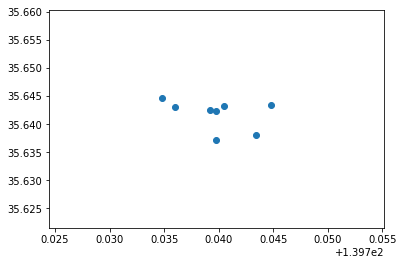

In [94]:
#To see distabces of parks by graph
total_park_lng= [park1_lng,park2_lng,park3_lng,park4_lng,park5_lng,park6_lng,park7_lng,park8_lng]
total_park_lat= [park1_lat,park2_lat,park3_lat,park4_lat,park5_lat,park6_lat,park7_lat,park8_lat]
plt.scatter(total_park_lng,total_park_lat)
#plt.plot(total_park_P, total_park_P)
plt.show()

In [83]:
#now to make it easy for euclidean distance, do some work
a = 0
for lat, lng, label in zip(dataframe4_filtered_park.lat, dataframe4_filtered_park.lng, dataframe4_filtered_park.categories):
    #counting for puting each one 
    a += 1
    #Longitude should be x Latitude should be y so (lng, lat)
    #P means position and place
    if a == 1:
        park1_P = (lng, lat)
        
    if a == 2:
        park2_P = (lng, lat)  
        
    if a == 3:
        park3_P = (lng, lat)
        
    if a == 4:
        park4_P = (lng, lat)
        
    if a == 5:
        park5_P = (lng, lat)
        
    if a == 6:
        park6_P = (lng, lat)
    if a == 7:
        park7_P = (lng, lat)
    if a == 8:
        park8_P = (lng, lat)

#make sure correct numbers are in
print(park1_P)
print(park2_P)
print(park7_P)
print(park8_P)       

(139.74052164682098, 35.643333781815215)
(139.74337874577267, 35.63810056832932)
(139.73973691463468, 35.6371190385355)
(139.73482354025282, 35.644718264175225)


In [108]:
a = 0
from scipy.spatial import distance


for lat, lng, label in zip(dataframe4_filtered_park.lat, dataframe4_filtered_park.lng, dataframe4_filtered_park.categories):
    #euclidean distance formula for scipy distance.euclidean(A,B)
    
     #For putting in lat and lng
    a += 1
    
    #D means euclidean distance
    xy = (lng,lat)
    lst = list(xy)
    
    dst1 = distance.euclidean(lst, park1_P)
     
    dst2 = distance.euclidean(lst, park2_P)
    
    dst3 = distance.euclidean(lst, park3_P)
    
    dst4 = distance.euclidean(lst, park4_P)
    
    dst5 = distance.euclidean(lst, park5_P)
    
    dst6 = distance.euclidean(lst, park6_P)
    
    dst7 = distance.euclidean(lst, park7_P)
    
    dst8 = distance.euclidean(lst, park8_P)
   
    #I am going to simply plus all euclidean distance of each parks
    # because I want to know which ones are far from each parks 
    #T means total
    if a == 1:
        park1_D_T = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 + dst8
    if a == 2:
        park2_D_T = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 + dst8
    if a == 3:
        park3_D_T = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 + dst8
    if a == 4:
        park4_D_T = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 + dst8
    if a == 5:
        park5_D_T = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 + dst8
    if a == 6:
        park6_D_T = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 + dst8
    if a == 7:
        park7_D_T = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 + dst8
    if a == 8:
        park8_D_T = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 + dst8
    
    
    
#Total euclidean distance of each parks and          
print(park1_D_T)
print(park2_D_T)
print(park3_D_T)
print(park4_D_T)
print(park5_D_T)
print(park6_D_T)
print(park7_D_T)
    

0.029713963964695146
0.046620554218067295
0.027409242390096945
0.0270716341536319
0.03836509289952333
0.04761112734653386
0.04481591181121453


### Next I will collect euclidean distances of each restaurant to parks.

In [120]:
# First to see how far each parks
a = 0
for lat, lng, label in zip(dataframe4_filtered_r.lat, dataframe4_filtered_r.lng, dataframe4_filtered_r.categories):
    #counting for puting each one 
    a += 1
    #Longitude should be x Latitude should be y so (lng, lat)
    
    if a == 1:
        res1_lng = lng
        res1_lat = lat
    if a == 2:
        res2_lng = lng
        res2_lat = lat 
        
    if a == 3:
        res3_lng = lng
        res3_lat = lat
        
    if a == 4:
        res4_lng = lng
        res4_lat = lat
        
    if a == 5:
        res5_lng = lng
        res5_lat = lat
        
    if a == 6:
        res6_lng = lng
        res6_lat = lat
    if a == 7:
        res7_lng = lng
        res7_lat = lat
    


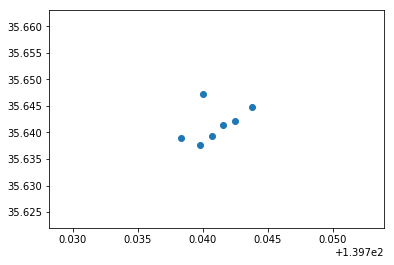

In [121]:
#To see distabces of restaurants by graph
total_res_lng= [res1_lng,res2_lng,res3_lng,res4_lng,res5_lng,res6_lng,res7_lng]
total_res_lat= [res1_lat,res2_lat,res3_lat,res4_lat,res5_lat,res6_lat,res7_lat]
plt.scatter(total_res_lng,total_res_lat)

plt.show()

In [123]:
#now to make it easy for euclidean distance, do some work
a = 0
for lat, lng, label in zip(dataframe4_filtered_r.lat, dataframe4_filtered_r.lng, dataframe4_filtered_r.categories):
    #counting for puting each one 
    a += 1
    #Longitude should be x Latitude should be y so (lng, lat)
    #P means position and place
    if a == 1:
        res1_P = (lng, lat)
        
    if a == 2:
        res2_P = (lng, lat)  
        
    if a == 3:
        res3_P = (lng, lat)
        
    if a == 4:
        res4_P = (lng, lat)
        
    if a == 5:
        res5_P = (lng, lat)
        
    if a == 6:
        res6_P = (lng, lat)
    if a == 7:
        res7_P = (lng, lat)
        

#make sure correct numbers are in
print(res1_P)
print(res2_P)
print(res6_P)
print(res7_P)    

(139.74154452957507, 35.641460068458066)
(139.74004258287246, 35.64732119786548)
(139.74381513073064, 35.64485581250407)
(139.73978519439697, 35.637705904771735)


In [125]:
a = 0


for lat, lng, label in zip(dataframe4_filtered_park.lat, dataframe4_filtered_park.lng, dataframe4_filtered_park.categories):
    #euclidean distance formula for scipy distance.euclidean(A,B)
    
     #For putting in lat and lng
    a += 1
    
    #D means euclidean distance
    xy = (lng,lat)
    lst = list(xy)
    
    dst1 = distance.euclidean(lst, res1_P)
     
    dst2 = distance.euclidean(lst, res2_P)
    
    dst3 = distance.euclidean(lst, res3_P)
    
    dst4 = distance.euclidean(lst, res4_P)
    
    dst5 = distance.euclidean(lst, res5_P)
    
    dst6 = distance.euclidean(lst, res6_P)
    
    dst7 = distance.euclidean(lst, res7_P)
    
   
    #I am going to simply plus all euclidean distance of each parks(This is distance from restaurants)
    # because I want to know which ones are far from each restaurant 
    #T means total and R means restaurant
    if a == 1:
        park1_D_T_R = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 
    if a == 2:
        park2_D_T_R = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 
    if a == 3:
        park3_D_T_R = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 
    if a == 4:
        park4_D_T_R = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 
    if a == 5:
        park5_D_T_R = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 
    if a == 6:
        park6_D_T_R = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 
    if a == 7:
        park7_D_T_R = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 
    if a == 8:
        park8_D_T_R = dst1 + dst2 + dst3 + dst4 + dst5 + dst6 + dst7 
    
#Total euclidean distance to all restaurants from each park         
print(park1_D_T_R)
print(park2_D_T_R)
print(park3_D_T_R)
print(park4_D_T_R)
print(park5_D_T_R)
print(park6_D_T_R)
print(park7_D_T_R)
print(park8_D_T_R)

0.026776597313461988
0.036198752026547196
0.02800873430331833
0.026134157719034375
0.04359910693926423
0.0356932023684455
0.034613302318696276
0.0537966928946485


### Now I have all euclidean distance of each park and restaurant for all parks
### I will make data table for this.

In [132]:
arr_park_D_T = dict(Distance_parks =[park1_D_T ,park2_D_T ,park3_D_T ,park4_D_T ,park5_D_T ,park6_D_T ,park7_D_T ,park8_D_T], 
                    Distance_restaurants=[park1_D_T_R,park2_D_T_R,park3_D_T_R,park4_D_T_R,park5_D_T_R,park6_D_T_R,park7_D_T_R,park8_D_T_R])
pd.DataFrame(data=arr_park_D_T)

,Distance_parks,Distance_restaurants
0,0.029714,0.026777
1,0.046621,0.036199
2,0.027409,0.028009
3,0.027072,0.026134
4,0.038365,0.043599
5,0.047611,0.035693
6,0.044816,0.034613
7,0.048215,0.053797


### Distance of parks shoukd be the least and distance to restaurants should be the biggest.
### Here is very simple calculation.
### Distance to restaurants minus distance to parks.
### The way to think it is distance to restaurant is better if it is far so it is positive distance.
### Distance to parks is better if it is close so it is negative distance.
### Therefore, if it is positive and big number. It is ideal number.
### If the total number is big, the park is the best for opening new restaurants.

In [135]:
#this is the last distance to obtain.
Distance_last=dict(the_best_park=[park1_D_T-  park1_D_T_R,  park2_D_T- park2_D_T_R,  park3_D_T - park3_D_T_R , park4_D_T - park4_D_T_R, park5_D_T - park5_D_T_R, 
               park6_D_T - park6_D_T_R, park7_D_T - park7_D_T_R, park8_D_T - park8_D_T_R])
pd.DataFrame(data=Distance_last)

,the_best_park
0,0.002937
1,0.010422
2,-0.000599
3,0.000937
4,-0.005234
5,0.011918
6,0.010203
7,-0.005582


### As you see here.
### The 6th park is the most idealistic  location.
### I will make a graph too.

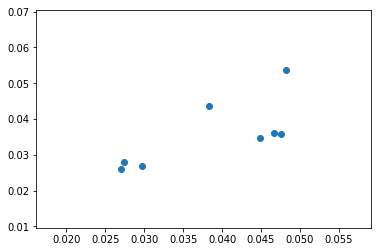

In [136]:
#To see distabces of parks by graph
# x = Distance_parks , y = Distance_restaurants
Distance_parks =[park1_D_T ,park2_D_T ,park3_D_T ,park4_D_T ,park5_D_T ,park6_D_T ,park7_D_T ,park8_D_T]
Distance_restaurants=[park1_D_T_R,park2_D_T_R,park3_D_T_R,park4_D_T_R,park5_D_T_R,park6_D_T_R,park7_D_T_R,park8_D_T_R]
plt.scatter(Distance_parks , Distance_restaurants)
plt.show()

### In the bottom 3 are 2nd, 6th and 7th park. 
### And the bottommost is the 6th park.

In [149]:
Minato_map = folium.Map(location=[latitude_Minato, longitude_Minato], zoom_start=15) # generate map centred around Ecco


# add Ecco as a red circle mark
folium.CircleMarker(
    [latitude_Minato, longitude_Minato],
    radius=10,
    popup = folium.Popup("label"),
    #popup = label,
    fill=True,
    color='red',
    fill_color='red',
    fill_opacity=0.6
    ).add_to(Minato_map)
a = 0
# marks of parks
for lat, lng, label in zip(dataframe4_filtered_park.lat, dataframe4_filtered_park.lng, dataframe4_filtered_park.categories):
    a += 1
    # just draw 6th
    if a == 6:
        folium.CircleMarker(
              [lat, lng],
                radius=5,
             #popup=label,
                popup = folium.Popup("the best park"),
                fill=True,
                color='red',
                fill_color='green',
                fill_opacity=0.6
                ).add_to(Minato_map)

b = 0
for lat, lng, label in zip(dataframe4_filtered_park.lat, dataframe4_filtered_park.lng, dataframe4_filtered_park.categories):
    # just draw 6th
    b += 1
    if b != 6:
        folium.CircleMarker(
              [lat, lng],
                radius=5,
             #popup=label,
                popup = folium.Popup("the best park"),
                fill=True,
                color='green',
                fill_color='green',
                fill_opacity=0.6
                ).add_to(Minato_map)
# marks of restaurants
for lat, lng, label in zip(dataframe4_filtered_r.lat, dataframe4_filtered_r.lng, dataframe4_filtered_r.categories):
    
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        #popup=label,
        popup = folium.Popup("label"),
        fill=True,
        color='blue',
        fill_color='blue',
        fill_opacity=0.6
        ).add_to(Minato_map)

# display map
Minato_map

### I showed in this map that red circled green mark is the best park for opning new restaurant by given from caliculating all euclidean distance.
###